## Chapter 16: Data, Data everywhere<br><small>November 9, 2016</small>

### Parametric Data Types <small>(From Chapter 8)</small>

In [1]:
type Polynomial{T}
    coeffs::Vector{T}
end

In [2]:
poly1=Polynomial([1,2,3])

Polynomial{Int64}([1,2,3])

In [3]:
poly2=Polynomial([2.0,-3.0,0.0])

Polynomial{Float64}([2.0,-3.0,0.0])

In [4]:
poly3=Polynomial(["c","b","a"])

Polynomial{String}(String["c","b","a"])

In [5]:
function printPolygon(p::Polynomial)
    str = ""
    for i = 1:length(p.coeffs)
        str = string(str, p.coeffs[i], "x^", i-1, i<length(p.coeffs)?"+":"")
    end
    str
end

printPolygon (generic function with 1 method)

In [6]:
printPolygon(poly1)

"1x^0+2x^1+3x^2"

In [7]:
printPolygon(poly2)

"2.0x^0+-3.0x^1+0.0x^2"

In [8]:
printPolygon(poly3)

"cx^0+bx^1+ax^2"

In [9]:
import Base.+

In [10]:
function +{T1<:Number,T2<:Number}(p1::Polynomial{T1}, p2::Polynomial{T2})
    Polynomial(p1.coeffs + p2.coeffs)
end

+ (generic function with 164 methods)

In [11]:
methods(+);

In [12]:
poly1+poly2

Polynomial{Float64}([3.0,-1.0,3.0])

In [13]:
printPolygon(poly1+poly2)

"3.0x^0+-1.0x^1+3.0x^2"

In [14]:
poly1+poly3

LoadError: LoadError: MethodError: no method matching +(::Polynomial{Int64}, ::Polynomial{String})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
  +{T1<:Number,T2<:Number}(::Polynomial{T1<:Number}, !Matched::Polynomial{T2<:Number}) at In[10]:2
while loading In[14], in expression starting on line 1

### Data and Data Frames <small>Back to this chapter</small>
<hr>
**DataArray**  
- Single Type
- Handle Missing Data

In [15]:
using DataFrames

In [16]:
NA

NA

In [17]:
NA+1

NA

In [18]:
2*NA

NA

In [19]:
NA/NA

NA

In [20]:
z=NA

NA

In [21]:
typeof(z)

DataArrays.NAtype

Building a DataArray

In [22]:
data = @data([1,2,3,4])

4-element DataArrays.DataArray{Int64,1}:
 1
 2
 3
 4

In [23]:
mean(data)

2.5

In [24]:
std(data)

1.2909944487358056

In [25]:
data1 = @data([1,2,3,4,NA])

5-element DataArrays.DataArray{Int64,1}:
 1  
 2  
 3  
 4  
  NA

In [26]:
mean(data1)

NA

In [27]:
dropna(data1)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [28]:
sum(dropna(data1))

10

In [29]:
df=DataFrame(name=["A","B","C","D","E","F"],age=[21,27,13,41,33,48])

,name,age
1,A,21
2,B,27
3,C,13
4,D,41
5,E,33
6,F,48


In [30]:
mean(df[:age]) # get mean of ages in dataframe above

30.5

In [31]:
mean(df[:,2]) # same thing if you know what column number contains ages.

30.5

In [32]:
df[:age] # output ages

6-element DataArrays.DataArray{Int64,1}:
 21
 27
 13
 41
 33
 48

In [33]:
typeof(df[:age])

DataArrays.DataArray{Int64,1}

In [34]:
typeof(df[:name])

DataArrays.DataArray{String,1}

Given the politics that are happening concurrently, let's look at some census data...

In [35]:
census_data=readtable("Gaz_ua_national.txt",separator='\t');

In [36]:
head(census_data)

,GEOID,NAME,UATYPE,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,37,"Abbeville, LA Urban Cluster",C,19824,8460,29222871,300497,11.283,0.116,29.967602,-92.098219
2,64,"Abbeville, SC Urban Cluster",C,5243,2578,11315197,19786,4.369,0.008,34.179237,-82.379726
3,91,"Abbotsford, WI Urban Cluster",C,3966,1616,5363441,13221,2.071,0.005,44.948612,-90.315875
4,118,"Aberdeen, MS Urban Cluster",C,4666,2050,7416616,52732,2.864,0.02,33.824742,-88.554591
5,145,"Aberdeen, SD Urban Cluster",C,25977,12114,33002447,247597,12.742,0.096,45.463186,-98.471033
6,172,"Aberdeen, WA Urban Cluster",C,29856,13139,39997951,1929689,15.443,0.745,46.976365,-123.796056


In [37]:
typeof(census_data[:GEOID])

DataArrays.DataArray{Int64,1}

**Here’s a few questions we may want to know:**

1. What are the top 10 areas in population
1. Give a histogram plot in terms of population? (What are good bin sizes?)
1. What is the total population of all areas?
1. What the top 10 area in housing units?
1. What is the total number of housing units?
1. What is the average number of people per housing units for all areas?
1. For the top 10 area in population, find the average number of people per housing unit?
1. What are the top 10 areas in land size?
1. What are the top 10 areas in water size?
1. What are the Massachusetts areas in the data?
1. What is the average population, median and standard deviation of the areas?

Let's put this in a  reasonable type format

In [57]:
census_data=readtable("Gaz_ua_national.txt",separator='\t',eltypes=[String,String,String,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64]);
#census_data=readtable("Gaz_ua_national.txt",separator='\t',eltypes=[String(:GEOID)]);

In [58]:
head(census_data)

,GEOID,NAME,UATYPE,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,00037,"Abbeville, LA Urban Cluster",C,19824,8460,29222871,300497,11.283,0.116,29.967602,-92.098219
2,00064,"Abbeville, SC Urban Cluster",C,5243,2578,11315197,19786,4.369,0.008,34.179237,-82.379726
3,00091,"Abbotsford, WI Urban Cluster",C,3966,1616,5363441,13221,2.071,0.005,44.948612,-90.315875
4,00118,"Aberdeen, MS Urban Cluster",C,4666,2050,7416616,52732,2.864,0.02,33.824742,-88.554591
5,00145,"Aberdeen, SD Urban Cluster",C,25977,12114,33002447,247597,12.742,0.096,45.463186,-98.471033
6,00172,"Aberdeen, WA Urban Cluster",C,29856,13139,39997951,1929689,15.443,0.745,46.976365,-123.796056


In [59]:
typeof(census_data[:GEOID])

DataArrays.DataArray{String,1}

Much better

In [60]:
sum(census_data[:POP10])

252746527

In [61]:
size(census_data)

(3592,11)

In [66]:
sort!(census_data,cols=[:POP10],rev=true)[1,:] # Get the most population dense area

,GEOID,NAME,UATYPE,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,63217,"New York--Newark, NY--NJ--CT Urbanized Area",U,18351295,7263095,8935981360,533176599,3450.202,205.861,40.718357,-73.970221


In [72]:
census_data[:INTPTLONG] .< -120

3592-element DataArrays.DataArray{Bool,1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true
     ⋮
 false
 false
 false
  true
 false
 false
 false
 false
 false
 false
 false
 false

In [78]:
west = census_data[census_data[:INTPTLONG] .< -120,:] # Everywhere west of 120 deg

,GEOID,NAME,UATYPE,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,78904,"San Francisco--Oakland, CA Urbanized Area",U,3281212,1338437,1356171095,24162411,523.621,9.329,37.690191,-122.128542
2,80389,"Seattle, WA Urbanized Area",U,3059393,1309501,2616697301,173839079,1010.313,67.12,47.468576,-122.274888
3,71317,"Portland, OR--WA Urbanized Area",U,1849898,777016,1358145997,35061631,524.383,13.537,45.520404,-122.651087
4,77068,"Sacramento, CA Urbanized Area",U,1723634,676840,1219827292,12813910,470.978,4.947,38.638578,-121.324669
5,79039,"San Jose, CA Urbanized Area",U,1664496,593475,740693828,1122773,285.983,0.434,37.329845,-121.945145
6,89770,"Urban Honolulu, HI Urbanized Area",U,802459,288351,440739747,12600112,170.171,4.865,21.364556,-157.939756
7,19504,"Concord, CA Urbanized Area",U,615968,244581,527710827,1042032,203.75,0.402,37.848003,-122.017105
8,85087,"Stockton, CA Urbanized Area",U,370583,125027,239632615,4315919,92.523,1.666,37.961908,-121.287516
9,58006,"Modesto, CA Urbanized Area",U,358172,124923,237964402,914405,91.879,0.353,37.674451,-120.965861
10,79498,"Santa Rosa, CA Urbanized Area",U,308231,122312,253792769,596857,97.99,0.23,38.444378,-122.740631


In [79]:
size(west)

(279,11)

In [93]:
names = map(a->contains(a, "MA"), census_data[:NAME]).==true

3592-element DataArrays.DataArray{Bool,1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [94]:
census_data[names,:]

,GEOID,NAME,UATYPE,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,09271,"Boston, MA--NH--RI Urbanized Area",U,4181019,1719241,4852227548,201870511,1873.456,77.943,42.373132,-71.140708
2,72505,"Providence, RI--MA Urbanized Area",U,1190956,516656,1411660749,85343906,545.045,32.951,41.776323,-71.397401
3,83926,"Springfield, MA--CT Urbanized Area",U,621300,250699,902757017,26890068,348.556,10.382,42.125901,-72.573958
4,97291,"Worcester, MA--CT Urbanized Area",U,486514,201663,787645247,33522645,304.112,12.943,42.278357,-71.703799
5,05167,"Barnstable Town, MA Urbanized Area",U,246695,162112,718092279,58453185,277.257,22.569,41.622829,-70.576489
6,61165,"Nashua, NH--MA Urbanized Area",U,226400,91802,472097920,9254780,182.278,3.573,42.820934,-71.440785
7,61786,"New Bedford, MA Urbanized Area",U,149443,64978,142709138,14485580,55.1,5.593,41.673929,-70.937061
8,49096,"Leominster--Fitchburg, MA Urbanized Area",U,116960,50827,168447165,5905576,65.038,2.28,42.569209,-71.850936
9,69778,"Pittsfield, MA Urbanized Area",U,59124,28511,86766391,4782300,33.501,1.846,42.481061,-73.22006
10,34975,"Greenfield, MA Urban Cluster",C,22965,10890,36536672,871148,14.107,0.336,42.587098,-72.5666


In [97]:
density = DataFrame(GEOID=census_data[:GEOID], NAME=census_data[:NAME], DENSITY=census_data[:POP10]./census_data[:HU10])

,GEOID,NAME,DENSITY
1,63217,"New York--Newark, NY--NJ--CT Urbanized Area",2.526649451783296
2,51445,"Los Angeles--Long Beach--Anaheim, CA Urbanized Area",2.881125268171653
3,16264,"Chicago, IL--IN Urbanized Area",2.488455757985024
4,56602,"Miami, FL Urbanized Area",2.2521308225155003
5,69076,"Philadelphia, PA--NJ--DE--MD Urbanized Area",2.4384008338363325
6,22042,"Dallas--Fort Worth--Arlington, TX Urbanized Area",2.531542138066359
7,40429,"Houston, TX Urbanized Area",2.6082240052329784
8,92242,"Washington, DC--VA--MD Urbanized Area",2.507053662493318
9,03817,"Atlanta, GA Urbanized Area",2.425125622203174
10,09271,"Boston, MA--NH--RI Urbanized Area",2.4318981457515263


In [99]:
sort!(density,cols=[:DENSITY],rev=true) # People per Housing Unit

,GEOID,NAME,DENSITY
1,00676,"Air Force Academy, CO Urban Cluster",16.9079754601227
2,18802,"Colorado City, AZ--UT Urban Cluster",8.18389662027833
3,45370,"Kinross, MI Urban Cluster",6.757731958762887
4,82846,"Soledad, CA Urban Cluster",6.616424381535323
5,01333,"Alfred, NY Urban Cluster",6.558421851289833
6,04465,"Avenal, CA Urban Cluster",6.447127393838468
7,20044,"Corcoran, CA Urban Cluster",6.121880998080615
8,58654,"Montgomery, PA Urban Cluster",5.834538878842676
9,22301,"Darbydale, OH Urban Cluster",5.621597096188748
10,97200,"Woodville, FL Urban Cluster",5.373267326732673


### Olympic Athletes

Let’s look at another data file.

The file OlympicAthletes_0.csv lists all olympic medals between 2000 and 2012 and save it somewhere that you can access it from Julia. It is a comma separated file (CSV). Load it as a dataframe.

**Here’s some questions to answer:**

1. What is the total number of medals given in all Olympics in the dataset?
1. Who had the most olympic gold medals in the Summer 2000 games? How many medals?
1. Collectively taking each olympics, give the top 10 athletes by number of medals.
1. Who has the most Olympic Silver medals in the data set (Collectively over multiple olympics)
1. Produce a new DataFrame that lists total number of medals by country. Produce a histogram of the total number of medals.
1. Plot the number of medals that the U.S. collected over each olympic year.
1. What is the age with the most number of total medals.
1. Produce a new data set with total number of medals per sport per year. What are the top five sports over the past 4 olympics.

In [100]:
oly = readtable("OlympicAthletes_0.csv",separator=',');

In [101]:
head(oly)

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Michael Phelps,23,United States,2008,8/24/08,Swimming,8,0,0,8
2,Michael Phelps,19,United States,2004,8/29/04,Swimming,6,0,2,8
3,Michael Phelps,27,United States,2012,8/12/12,Swimming,4,2,0,6
4,Natalie Coughlin,25,United States,2008,8/24/08,Swimming,1,2,3,6
5,Aleksey Nemov,24,Russia,2000,10/1/00,Gymnastics,2,1,3,6
6,Alicia Coutts,24,Australia,2012,8/12/12,Swimming,1,3,1,5


**1. What is the total number of medals given in all Olympics in the dataset?**  
This will be the sum of the `Total_Medals` column:

In [102]:
sum(oly[:Total_Medals])

9529

**2. Who had the most olympic gold medals in the Summer 2000 games? How many medals?**  
In this case, we will get a subset of the DataFrame and sort by Total Medals

In [103]:
sort!(oly[oly[:Year] .== 2000,:],cols=[:Total_Medals],rev=true)

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Aleksey Nemov,24,Russia,2000,10/1/00,Gymnastics,2,1,3,6
2,Ian Thorpe,17,Australia,2000,10/1/00,Swimming,3,2,0,5
3,Dara Torres,33,United States,2000,10/1/00,Swimming,2,0,3,5
4,Inge de Bruijn,27,Netherlands,2000,10/1/00,Swimming,3,1,0,4
5,Gary Hall Jr.,25,United States,2000,10/1/00,Swimming,2,1,1,4
6,Michael Klim,23,Australia,2000,10/1/00,Swimming,2,2,0,4
7,Susie O'Neill,27,Australia,2000,10/1/00,Swimming,1,3,0,4
8,Jenny Thompson,27,United States,2000,10/1/00,Swimming,3,0,1,4
9,Pieter van den Hoogenband,22,Netherlands,2000,10/1/00,Swimming,2,0,2,4
10,Dmitry Sautin,26,Russia,2000,10/1/00,Diving,1,1,2,4


Which concludes Aleksey Nemov had the most at 6 medals

**3. Collectively taking each olympics, give the top 10 athletes by number of medals.**  
We need to do a bit of work for this one. Since over all olympics for each athlete we need to add up all of the medals. Fortunately, in the `DataFrames` package, there is a function that does this, the by function and go check it out in the <a href="http://juliastats.github.io/DataFrames.jl/stable/man/split_apply_combine/">DataFrames</a> documentation.

First, we group the data by Athlete’s name (in the `Athlete` column) To see what happens with this, we do

In [104]:
groupby(oly,:Athlete)

DataFrames.GroupedDataFrame  6956 groups with keys: Symbol[:Athlete]
First Group:
5×10 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ Athlete │ Age │ Country     │ Year │ Closing_Ceremony_Date │
├─────┼─────────┼─────┼─────────────┼──────┼───────────────────────┤
│ 1   │ NA      │ NA  │ "Brazil"    │ 2012 │ "8/12/12"             │
│ 2   │ NA      │ NA  │ "Brazil"    │ 2012 │ "8/12/12"             │
│ 3   │ NA      │ NA  │ "Brazil"    │ 2012 │ "8/12/12"             │
│ 4   │ NA      │ NA  │ "Argentina" │ 2012 │ "8/12/12"             │
│ 5   │ NA      │ NA  │ "Argentina" │ 2012 │ "8/12/12"             │

│ Row │ Sport        │ Gold_Medals │ Silver_Medals │ Bronze_Medals │
├─────┼──────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ "Volleyball" │ 0           │ 1             │ 0             │
│ 2   │ "Volleyball" │ 0           │ 1             │ 0             │
│ 3   │ "Volleyball" │ 0           │ 1             │ 0             │
│ 4   │ "Hockey"     │ 0           │ 1      

and you will see 6956 groups of Athletes and julia will print out the first and last one. Since we would like to just total up the number of medals, we want want to sum within each subgroup. The following will do this:

In [107]:
total = by(oly,:Athlete) do df # df is dataframe
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end

,Athlete,Total_Medals
1,NA,5
2,A. J. Mleczko,1
3,Aaron Armstrong,1
4,Aaron Egbele,1
5,Aaron Gate,1
6,Aaron McIntosh,1
7,Aaron Miller,1
8,Aaron Nguimbat,1
9,Aaron Peirsol,7
10,Abbos Atayev,1


The `by` function create the subgroups and then creates a new `DataFrame` with a new column that is the sum of the `Total_Medals`. And then we sort:

In [108]:
sort!(total,cols=[:Total_Medals],rev=true)

,Athlete,Total_Medals
1,Michael Phelps,22
2,Natalie Coughlin,12
3,Ryan Lochte,11
4,Ian Thorpe,9
5,Leisel Jones,9
6,Ole Einar Bjørndalen,9
7,Apolo Anton Ohno,8
8,Dara Torres,8
9,Inge de Bruijn,8
10,Jason Lezak,8


And of course Michael Phelps has the lead with 22 total career medals

**4. Who has the most Olympic Silver medals in the data set (Collectively over multiple olympics)**  
This is very similar to that above except that the Silver Medals are examined instead.

In [111]:
silver = by(oly,:Athlete) do df # df is dataframe
    DataFrame(Silver_Medals=sum(df[:Silver_Medals]))
end
silver = sort!(silver,cols=[:Silver_Medals],rev=true)
silver[1,:]

,Athlete,Silver_Medals
1,NA,5


Which funny enough is a person that nobody knows the name of.

**5. Produce a new DataFrame that lists total number of medals by country. Produce a histogram of the total number of medals.**  
This is similar to the total numbers by athletes:

In [115]:
countries = by(oly,:Country) do df # df is dataframe
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end
countries = sort!(countries,cols=[:Total_Medals],rev=true)
head(countries)

,Country,Total_Medals
1,United States,1312
2,Russia,768
3,Germany,629
4,Australia,609
5,China,530
6,Canada,370


Yay, USA!!!

In [113]:
using Gadfly

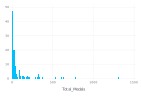

In [114]:
plot(countries,x=:Total_Medals,Geom.histogram)

**6. Plot the number of medals that the U.S. collected over each olympic year.**  
In this case, we need to just get a subset of the U.S. medals:

In [116]:
us_medals = oly[oly[:Country] .== "United States",:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Michael Phelps,23,United States,2008,8/24/08,Swimming,8,0,0,8
2,Michael Phelps,19,United States,2004,8/29/04,Swimming,6,0,2,8
3,Michael Phelps,27,United States,2012,8/12/12,Swimming,4,2,0,6
4,Natalie Coughlin,25,United States,2008,8/24/08,Swimming,1,2,3,6
5,Missy Franklin,17,United States,2012,8/12/12,Swimming,4,0,1,5
6,Ryan Lochte,27,United States,2012,8/12/12,Swimming,2,2,1,5
7,Allison Schmitt,22,United States,2012,8/12/12,Swimming,3,1,1,5
8,Natalie Coughlin,21,United States,2004,8/29/04,Swimming,2,2,1,5
9,Dara Torres,33,United States,2000,10/1/00,Swimming,2,0,3,5
10,Nastia Liukin,18,United States,2008,8/24/08,Gymnastics,1,3,1,5


and then subgroup by year:

In [117]:
us_by_year = by(us_medals,:Year) do df
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end

,Year,Total_Medals
1,2000,243
2,2002,84
3,2004,265
4,2006,52
5,2008,317
6,2010,97
7,2012,254


and the following gives a decent plot:

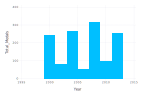

In [118]:
plot(us_by_year,x="Year",y="Total_Medals",Geom.bar)

**7. What is the age with the most number of total medals?**  
In this case, we group by age and sum total medals:

In [120]:
medals_by_age = by(oly,:Age) do df
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end;
sort!(medals_by_age,cols=[:Total_Medals],rev=true)

,Age,Total_Medals
1,24,807
2,26,765
3,25,763
4,23,757
5,27,724
6,22,720
7,28,701
8,29,572
9,21,520
10,30,486


And from that we can see that those age 24 scored the most medals at 807

**8. Produce a new data set with total number of medals per sport per year. What are the top five sports in medals for 2002, 2012?**  
In this case, we need to subgroup by both year and sport:

In [125]:
medals_by_year_by_sport = by(oly,[:Year,:Sport]) do df
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end
sort!(medals_by_year_by_sport[medals_by_year_by_sport[:Year] .== 2002,:],cols=[:Total_Medals], rev=true)

,Year,Sport,Total_Medals
1,2002,Ice Hockey,126
2,2002,Cross Country Skiing,54
3,2002,Short-Track Speed Skating,46
4,2002,Biathlon,42
5,2002,Alpine Skiing,30
6,2002,Curling,30
7,2002,Speed Skating,30
8,2002,Bobsleigh,24
9,2002,Figure Skating,18
10,2002,Nordic Combined,18


The top 5 overall we can see is Ice Hockey, Cross Country Skiing, Short-Track Speed Skating, Biathlon, and Alpine Skiing

In [126]:
sort!(medals_by_year_by_sport[medals_by_year[:Year] .== 2012,:],cols=[:Total_Medals], rev=true)

,Year,Sport,Total_Medals
1,2012,Swimming,195
2,2012,Athletics,192
3,2012,Rowing,144
4,2012,Football,105
5,2012,Hockey,98
6,2012,Handball,87
7,2012,Canoeing,81
8,2012,Cycling,81
9,2012,Waterpolo,76
10,2012,Basketball,72


Just in the Summer Olympics of 2012, however, Swimming was the top, which was followed by Athletics, Rowing, Football, and Hockey